<a href="https://colab.research.google.com/github/singhhshipra/AILAB2/blob/main/1BM22CS341_Lab_4_Linear_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[135.78767123]
180616.43835616432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

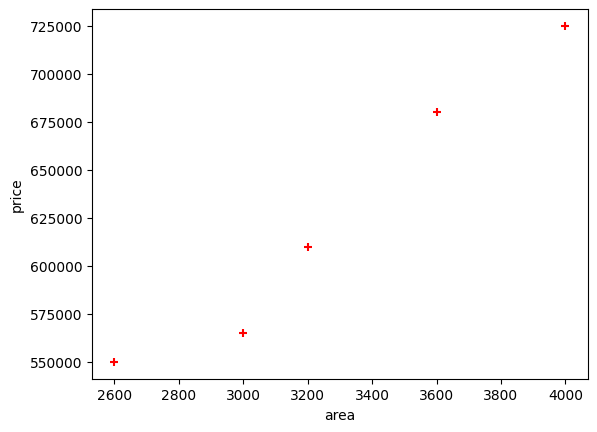

In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

print("coeff is",reg.coef_)

print("intercept is",reg.intercept_)


"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])


In [18]:
# -*- coding: utf-8 -*-
"""Multiple_LR_HomePrice.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1fK78C8TPV44HdvT6lsMhaau2wMtKXquQ
"""

import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

print("coeff is",reg.coef_)

print("intercept is",reg.intercept_)

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

coeff is [  112.06244194 23388.88007794 -3231.71790863]
intercept is 221323.00186540396


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted per capita income for 2020: 41288.69


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


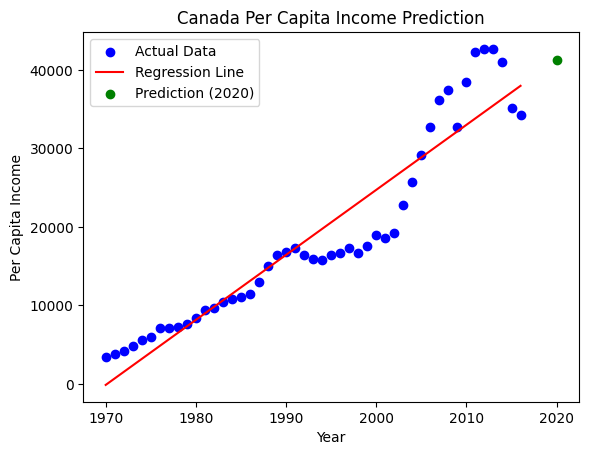

coeff is [828.46507522]
intercept is -1632210.7578554575


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset

df = pd.read_csv('canada_per_capita_income.csv')

# Check dataset structure
print(df.head())

# Renaming columns if needed
df.columns = ["year", "per_capita_income"]

# Reshape data
X = df[['year']]
y = df['per_capita_income']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict per capita income for 2020
predicted_income = model.predict([[2020]])
print(f"Predicted per capita income for 2020: {predicted_income[0]:.2f}")

# Plotting results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter([[2020]], predicted_income, color='green', label='Prediction (2020)')
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.title("Canada Per Capita Income Prediction")
plt.legend()
plt.show()
print("coeff is",model.coef_)
print("intercept is",model.intercept_)



Missing values in dataset:
 YearsExperience    2
Salary             0
dtype: int64
Predicted salary for 12 years of experience: 139574.04


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


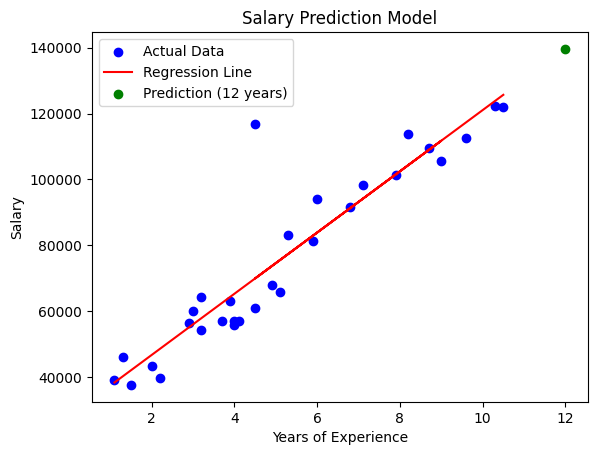

coeff is [9275.93010112]
intercept is 28262.879746248997


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset

df = pd.read_csv('salary.csv')

# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Drop rows with missing values
df.Salary=df.Salary.fillna(df.Salary.median())
df.YearsExperience=df.YearsExperience.fillna(df.YearsExperience.median())


# Reshape data
X = df[['YearsExperience']]
Y = df['Salary']

# Train the model
model = LinearRegression()
model.fit(X,Y)

# Predict salary for 12 years of experience
predicted_salary = model.predict([[12]])
print(f"Predicted salary for 12 years of experience: {predicted_salary[0]:.2f}")

# Plotting results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter([[12]], predicted_salary, color='green', label='Prediction (12 years)')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction Model")
plt.legend()
plt.show()
print("coeff is",model.coef_)
print("intercept is",model.intercept_)

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('hiring.csv')

# Rename columns for easier access
df.rename(columns={
    'test_score(out of 10)': 'test_score',
    'interview_score(out of 10)': 'interview_score',
    'salary($)': 'salary'
}, inplace=True)

# Convert experience column from text to numbers
def convert_to_number(word):
    word_to_number = {
        'zero': 0,
        'one': 1,
        'two': 2,
        'three': 3,
        'four': 4,
        'five': 5,
        'six': 6,
        'seven': 7,
        'eight': 8,
        'nine': 9,
        'ten': 10,
        'eleven': 11,
        'twelve': 12
    }
    return word_to_number.get(str(word).lower(), 0)

df['experience'] = df['experience'].apply(convert_to_number)

# Handle missing values
df.test_score = df.test_score.fillna(df.test_score.median())
df.experience = df.experience.bfill()

# Prepare data
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict salaries
salary_1 = model.predict([[2, 9, 6]])
salary_2 = model.predict([[12, 10, 10]])

print(f"Predicted salary for 2 yr exp, 9 test score, 6 interview score: {salary_1[0]:.2f}")
print(f"Predicted salary for 12 yr exp, 10 test score, 10 interview score: {salary_2[0]:.2f}")
print("coeff is",model.coef_)
print("intercept is",model.intercept_)

Predicted salary for 2 yr exp, 9 test score, 6 interview score: 53205.97
Predicted salary for 12 yr exp, 10 test score, 10 interview score: 92002.18
coeff is [2812.95487627 1845.70596798 2205.24017467]
intercept is 17737.263464337688


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("1000_Companies.csv")

# Select relevant features
X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = df["Profit"]

# One-hot encode categorical 'State' column
encoder = OneHotEncoder(drop="first", sparse_output=False)
state_encoded = encoder.fit_transform(X[["State"]])

# Convert encoded data to DataFrame and merge with X
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(["State"]))
X = X.drop("State", axis=1)
X = pd.concat([X, state_encoded_df], axis=1)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Prepare input data for prediction
input_data = pd.DataFrame([[91694.48, 515841.3, 11931.24, "Florida"]], columns=["R&D Spend", "Administration", "Marketing Spend", "State"])

# One-hot encode the state in input data
input_state_encoded = encoder.transform(input_data[["State"]])
input_state_df = pd.DataFrame(input_state_encoded, columns=encoder.get_feature_names_out(["State"]))

# Drop state column and merge with input data
input_data = input_data.drop("State", axis=1)
input_data = pd.concat([input_data, input_state_df], axis=1)

# Predict profit
predicted_profit = model.predict(input_data)
print(f"Predicted Profit: {predicted_profit[0]:.2f}")
print("coeff is",model.coef_)
print("intercept is",model.intercept_)

Predicted Profit: 510570.99
coeff is [ 5.53149346e-01  1.02624663e+00  8.10861610e-02 -4.46353536e+02
  9.77276094e+01]
intercept is -70051.24950374496
